In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(output_dim = 8, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 11880 images belonging to 8 classes.
Found 3960 images belonging to 8 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 11880,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 3960)

Epoch 1/100
371/371 [==============================] - 2651s 7s/step - loss: 1.9134 - acc: 0.2525 - precision: 0.2339 - recall: 0.0154 - val_loss: 1.6542 - val_acc: 0.3987 - val_precision: 0.4308 - val_recall: 0.0182
Epoch 2/100
371/371 [==============================] - 2641s 7s/step - loss: 1.7262 - acc: 0.3483 - precision: 0.5681 - recall: 0.0724 - val_loss: 1.4663 - val_acc: 0.4499 - val_precision: 0.6743 - val_recall: 0.1611
Epoch 3/100
371/371 [==============================] - 2634s 7s/step - loss: 1.6100 - acc: 0.3857 - precision: 0.6346 - recall: 0.1267 - val_loss: 1.4009 - val_acc: 0.4586 - val_precision: 0.7015 - val_recall: 0.1901
Epoch 4/100
371/371 [==============================] - 2646s 7s/step - loss: 1.5437 - acc: 0.4123 - precision: 0.6498 - recall: 0.1596 - val_loss: 1.2604 - val_acc: 0.5214 - val_precision: 0.7574 - val_recall: 0.2513
Epoch 5/100
371/371 [==============================] - 2639s 7s/step - loss: 1.4576 - acc: 0.4512 - precision: 0.6678 - recall: 0.21

Epoch 39/100
371/371 [==============================] - 2646s 7s/step - loss: 0.7867 - acc: 0.7129 - precision: 0.8019 - recall: 0.6127 - val_loss: 0.3391 - val_acc: 0.8874 - val_precision: 0.9253 - val_recall: 0.8311
Epoch 40/100
371/371 [==============================] - 2636s 7s/step - loss: 0.7775 - acc: 0.7171 - precision: 0.8004 - recall: 0.6178 - val_loss: 0.3661 - val_acc: 0.8667 - val_precision: 0.9120 - val_recall: 0.8240
Epoch 41/100
371/371 [==============================] - 2631s 7s/step - loss: 0.7803 - acc: 0.7148 - precision: 0.8043 - recall: 0.6210 - val_loss: 0.3458 - val_acc: 0.8770 - val_precision: 0.9233 - val_recall: 0.8323
Epoch 42/100
371/371 [==============================] - 2638s 7s/step - loss: 0.7609 - acc: 0.7224 - precision: 0.8111 - recall: 0.6280 - val_loss: 0.4035 - val_acc: 0.8560 - val_precision: 0.9102 - val_recall: 0.8058
Epoch 43/100
371/371 [==============================] - 2652s 7s/step - loss: 0.7511 - acc: 0.7237 - precision: 0.8120 - recall:

371/371 [==============================] - 2629s 7s/step - loss: 0.6146 - acc: 0.7728 - precision: 0.8366 - recall: 0.7102 - val_loss: 0.2333 - val_acc: 0.9215 - val_precision: 0.9507 - val_recall: 0.8910
Epoch 77/100
371/371 [==============================] - 2615s 7s/step - loss: 0.6020 - acc: 0.7780 - precision: 0.8406 - recall: 0.7189 - val_loss: 0.2215 - val_acc: 0.9313 - val_precision: 0.9563 - val_recall: 0.9051
Epoch 78/100
371/371 [==============================] - 2615s 7s/step - loss: 0.5970 - acc: 0.7804 - precision: 0.8449 - recall: 0.7211 - val_loss: 0.1925 - val_acc: 0.9432 - val_precision: 0.9644 - val_recall: 0.9169
Epoch 79/100
371/371 [==============================] - 2627s 7s/step - loss: 0.5924 - acc: 0.7848 - precision: 0.8461 - recall: 0.7226 - val_loss: 0.2033 - val_acc: 0.9341 - val_precision: 0.9552 - val_recall: 0.9101
Epoch 80/100
371/371 [==============================] - 2622s 7s/step - loss: 0.6062 - acc: 0.7813 - precision: 0.8446 - recall: 0.7206 - val

In [5]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [6]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      angry       0.12      0.12      0.12       528
       calm       0.12      0.13      0.13       528
    disgust       0.12      0.13      0.13       528
    fearful       0.15      0.15      0.15       528
      happy       0.16      0.16      0.16       528
    neutral       0.05      0.05      0.05       264
        sad       0.12      0.12      0.12       528
  surprised       0.13      0.13      0.13       528

avg / total       0.13      0.13      0.13      3960



Confusion matrix, without normalization
[[63 86 59 74 67 41 66 72]
 [75 69 78 67 69 39 60 71]
 [67 71 67 68 67 35 88 65]
 [68 65 72 77 72 29 83 62]
 [69 74 67 56 83 34 75 70]
 [33 43 36 40 32 14 30 36]
 [78 74 75 63 65 36 65 72]
 [76 80 85 61 59 31 68 68]]


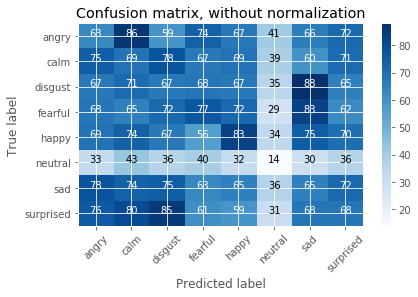

Normalized confusion matrix
[[11.9318 16.2879 11.1742 14.0152 12.6894  7.7652 12.5    13.6364]
 [14.2045 13.0682 14.7727 12.6894 13.0682  7.3864 11.3636 13.447 ]
 [12.6894 13.447  12.6894 12.8788 12.6894  6.6288 16.6667 12.3106]
 [12.8788 12.3106 13.6364 14.5833 13.6364  5.4924 15.7197 11.7424]
 [13.0682 14.0152 12.6894 10.6061 15.7197  6.4394 14.2045 13.2576]
 [12.5    16.2879 13.6364 15.1515 12.1212  5.303  11.3636 13.6364]
 [14.7727 14.0152 14.2045 11.9318 12.3106  6.8182 12.3106 13.6364]
 [14.3939 15.1515 16.0985 11.553  11.1742  5.8712 12.8788 12.8788]]


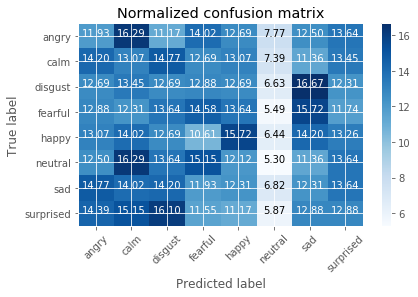

In [10]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn.png")
plt.show()

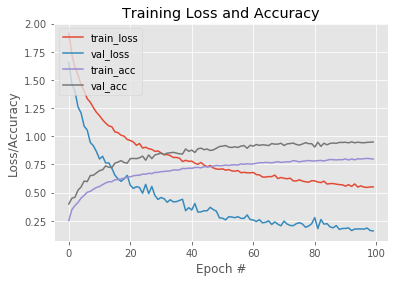

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn.png")